<a href="https://colab.research.google.com/github/alirezash97/Machine-Learning-Course/blob/main/DiabetesProject/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [2]:
dataset_x = pd.read_csv('/content/Diabetes_att.txt', sep=",", header=None)
dataset_x.columns = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']
dataset_x.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [3]:
dataset_y = pd.read_csv('/content/Diabetes_class.txt', sep=" ", header=None)
dataset_y.columns = ['Class']
dataset_y.head()

,Class
0,tested_positive
1,tested_negative
2,tested_positive
3,tested_negative
4,tested_positive


In [4]:
# normalization using z-score

cols = list(dataset_x.columns)
for col in cols:
    dataset_x[col] = (dataset_x[col] - dataset_x[col].mean())/dataset_x[col].std()
dataset_x.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483


In [5]:
dataset_y['Class'] = dataset_y['Class'].replace(['tested_positive','tested_negative'], [1, -1])
dataset_y.head()

,Class
0,1
1,-1
2,1
3,-1
4,1


In [6]:
 X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=42)

 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val) 
y_train = np.array(y_train).reshape((y_train.shape[0]))
y_test = np.array(y_test).reshape((y_test.shape[0]))
y_val = np.array(y_val).reshape((y_val.shape[0]))

In [8]:
print('train_x shape: ', X_train.shape) 
print('train_y shape: ', y_train.shape) 
print('validation_x shape: ', X_val.shape)   
print('validation_y shape: ', y_val.shape)  
print('test_x shape: ', X_test.shape)  
print('test_y shape: ', y_test.shape)  

train_x shape:  (460, 8)
train_y shape:  (460,)
validation_x shape:  (154, 8)
validation_y shape:  (154,)
test_x shape:  (154, 8)
test_y shape:  (154,)


In [9]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

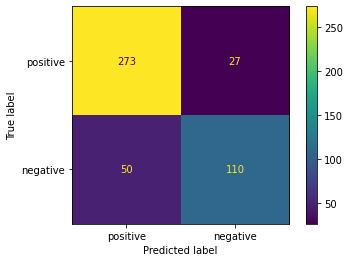

In [10]:
plot_confusion_matrix(svm_classifier, 
                      X_train,
                      y_train, 
                      values_format='d', 
                      display_labels = ['positive', 'negative'])

In [11]:
parameters = [{'C': [0.1, 1, 10, 100],
               'kernel': ['linear']}, ]

optimal_parameters_linear = GridSearchCV(
    svm_classifier,
    parameters, 
    scoring='accuracy'
    )

optimal_parameters_linear.fit(X_val, y_val)
print(optimal_parameters_linear.best_params_)

{'C': 1, 'kernel': 'linear'}


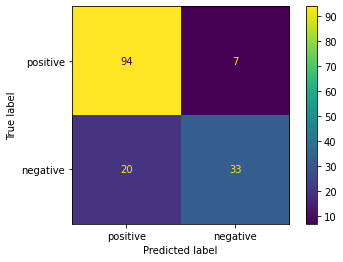

In [12]:
plot_confusion_matrix(optimal_parameters_linear, 
                      X_val,
                      y_val, 
                      values_format='d', 
                      display_labels = ['positive', 'negative'])

In [13]:
parameters = [{'C': [0.1, 1, 10, 100], 
               'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 
               'kernel': ['rbf']}, ]

optimal_parameters_rbf = GridSearchCV(
    svm_classifier,
    parameters, 
    scoring='accuracy'
    )

optimal_parameters_rbf.fit(X_val, y_val)
print(optimal_parameters_rbf.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


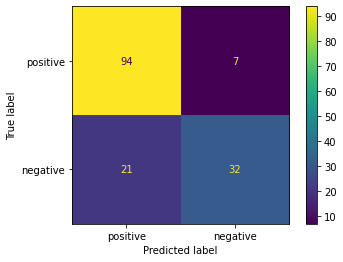

In [14]:
plot_confusion_matrix(optimal_parameters_rbf, 
                      X_val,
                      y_val, 
                      values_format='d', 
                      display_labels = ['positive', 'negative'])

In [15]:
# test our best linear model using testset
predicted_linear_model = optimal_parameters_linear.predict(X_test)
print(accuracy_score(y_test, predicted_linear_model))

0.7402597402597403


In [16]:
# test our best rbf model using testset
predicted_rbf_model = optimal_parameters_rbf.predict(X_test)
print(accuracy_score(y_test, predicted_rbf_model))

0.7467532467532467
